<a href="https://colab.research.google.com/github/jyotidabass/Revise-Deep-Learning-and-Computer-Vision/blob/main/Deep_Learning_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMONSTRATION 1 - BUILDING A NEURAL NETWORK FROM SCRATCH**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader



In [2]:
# Load and prepare data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.82MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.39MB/s]


In [3]:
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [4]:
# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')


Epoch 1, Loss: 0.3805
Epoch 2, Loss: 0.1828
Epoch 3, Loss: 0.1309
Epoch 4, Loss: 0.1096
Epoch 5, Loss: 0.0898
Epoch 6, Loss: 0.0823
Epoch 7, Loss: 0.0685
Epoch 8, Loss: 0.0631
Epoch 9, Loss: 0.0588
Epoch 10, Loss: 0.0536


In [6]:
# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 97.18%


# **DEMONSTRATION 2 - CONVOLUTIONAL NEURAL NETWORK FOR IMAGE CLASSIFICATION**

In [7]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [8]:
# Training is identical
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Same training loop as before
for epoch in range(10):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')


Epoch 1, Loss: 0.1520
Epoch 2, Loss: 0.0458
Epoch 3, Loss: 0.0317
Epoch 4, Loss: 0.0239
Epoch 5, Loss: 0.0186
Epoch 6, Loss: 0.0128
Epoch 7, Loss: 0.0106
Epoch 8, Loss: 0.0104
Epoch 9, Loss: 0.0076
Epoch 10, Loss: 0.0062


## **DEMONSTRATION 3 - TRANSFER LEARNING WITH PRETRAINED MODELS**

In [9]:
# DEMONSTRATION 3

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and prepare data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network (same as before)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =============================================================================
# TIP THREE: USE CHECKPOINTS TO SAVE PROGRESS
# =============================================================================

print("=" * 60)
print("TIP THREE: Use checkpoints to save progress")
print("=" * 60)

# Training with checkpoint saving
num_epochs = 5  # Using fewer epochs for demonstration
checkpoint_frequency = 2  # Save checkpoint every 2 epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}] completed, Average Loss: {avg_loss:.4f}')

    # Save checkpoint at specified intervals
    if (epoch + 1) % checkpoint_frequency == 0:
        checkpoint_path = f'checkpoint_epoch_{epoch+1}.pt'
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
        }, checkpoint_path)
        print(f'✓ Checkpoint saved: {checkpoint_path}')

print("\n" + "=" * 60)
print("Checkpoints saved successfully!")
print("=" * 60)

# =============================================================================
# LOADING A CHECKPOINT TO RESUME TRAINING
# =============================================================================

print("\n" + "=" * 60)
print("Loading checkpoint to resume training...")
print("=" * 60)

# Create a new model instance for demonstration
model_resumed = SimpleNN()
optimizer_resumed = optim.Adam(model_resumed.parameters(), lr=0.001)

# Load the most recent checkpoint
checkpoint_path = 'checkpoint_epoch_4.pt'  # Using epoch 4 checkpoint

try:
    checkpoint = torch.load(checkpoint_path)
    model_resumed.load_state_dict(checkpoint['model_state_dict'])
    optimizer_resumed.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch']
    previous_loss = checkpoint['loss']

    print(f'✓ Checkpoint loaded successfully!')
    print(f'  - Resumed from epoch: {start_epoch}')
    print(f'  - Previous loss: {previous_loss:.4f}')

    # Continue training from where we left off
    print(f'\nContinuing training from epoch {start_epoch + 1}...')

    for epoch in range(start_epoch, start_epoch + 2):  # Train for 2 more epochs
        model_resumed.train()
        running_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            optimizer_resumed.zero_grad()
            outputs = model_resumed(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_resumed.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{start_epoch + 2}], Average Loss: {avg_loss:.4f}')

except FileNotFoundError:
    print(f'✗ Error: Checkpoint file not found at {checkpoint_path}')
    print('  Make sure to run the training section first to create checkpoints.')

# =============================================================================
# TIP FOUR: MONITOR MULTIPLE METRICS
# =============================================================================

print("\n" + "=" * 60)
print("TIP FOUR: Monitor multiple metrics")
print("=" * 60)

# Evaluate the model with multiple metrics
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'\nModel Performance Metrics:')
print(f'  Accuracy:  {accuracy:.4f}')
print(f'  Precision: {precision:.4f}')
print(f'  Recall:    {recall:.4f}')
print(f'  F1-Score:  {f1:.4f}')

print("\n" + "=" * 60)
print("Demonstration 3 completed successfully!")
print("=" * 60)

TIP THREE: Use checkpoints to save progress
Epoch [1/5], Step [100/938], Loss: 0.5551
Epoch [1/5], Step [200/938], Loss: 0.3990
Epoch [1/5], Step [300/938], Loss: 0.5018
Epoch [1/5], Step [400/938], Loss: 0.3087
Epoch [1/5], Step [500/938], Loss: 0.2072
Epoch [1/5], Step [600/938], Loss: 0.2532
Epoch [1/5], Step [700/938], Loss: 0.1491
Epoch [1/5], Step [800/938], Loss: 0.2273
Epoch [1/5], Step [900/938], Loss: 0.3394
Epoch [1/5] completed, Average Loss: 0.3913
Epoch [2/5], Step [100/938], Loss: 0.2186
Epoch [2/5], Step [200/938], Loss: 0.2035
Epoch [2/5], Step [300/938], Loss: 0.2528
Epoch [2/5], Step [400/938], Loss: 0.2089
Epoch [2/5], Step [500/938], Loss: 0.1046
Epoch [2/5], Step [600/938], Loss: 0.0962
Epoch [2/5], Step [700/938], Loss: 0.0586
Epoch [2/5], Step [800/938], Loss: 0.1472
Epoch [2/5], Step [900/938], Loss: 0.1962
Epoch [2/5] completed, Average Loss: 0.1832
✓ Checkpoint saved: checkpoint_epoch_2.pt
Epoch [3/5], Step [100/938], Loss: 0.0965
Epoch [3/5], Step [200/938],

# **DEMONSTRATION 4 - OBJECT DETECTION WITH YOLO **

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading YOLOv8 model...
Model loaded successfully!
--2026-01-30 17:12:59--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 198.202.211.1
Connecting to ultralytics.com (ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2026-01-30 17:13:00--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 198.202.211.1, 2620:cb:2000::1
Connecting to www.ultralytics.com (www.ultralytics.com)|198.202.211.1|:443

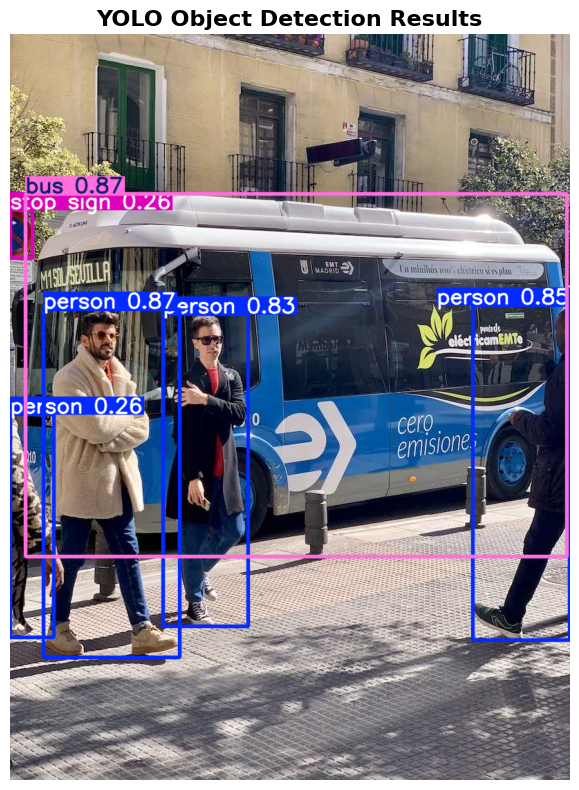


DETECTION DETAILS

Total objects detected: 6

Object #1:
  Class: bus
  Confidence: 87.34%
  Bounding Box: (23, 231) to (805, 757)

Object #2:
  Class: person
  Confidence: 86.57%
  Bounding Box: (49, 399) to (245, 903)

Object #3:
  Class: person
  Confidence: 85.28%
  Bounding Box: (669, 392) to (810, 877)

Object #4:
  Class: person
  Confidence: 82.52%
  Bounding Box: (222, 406) to (345, 858)

Object #5:
  Class: person
  Confidence: 26.11%
  Bounding Box: (0, 551) to (63, 873)

Object #6:
  Class: stop sign
  Confidence: 25.51%
  Bounding Box: (0, 254) to (33, 325)


Annotated image saved as 'detected_output.jpg'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started! Check your browser's downloads folder.

YOLO Object Detection Demo Complete!


In [10]:
# ============================================================================
# DEMONSTRATION 4 - OBJECT DETECTION WITH YOLO (GOOGLE COLAB COMPATIBLE)
# ============================================================================

# CELL 1: Installation
# Run this first to install required packages
!pip install ultralytics opencv-python-headless Pillow matplotlib

# CELL 2: Import libraries
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# CELL 3: Load pre-trained YOLOv8 model
print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')  # n for nano, smallest and fastest
print("Model loaded successfully!")

# CELL 4: Option 1 - Upload your own image
#print("Please upload an image file (jpg, png, etc.)")
#uploaded = files.upload()

# Get the uploaded filename
#image_path = list(uploaded.keys())[0]
#print(f"Image uploaded: {image_path}")

# CELL 5: Option 2 - Download a sample image from the internet (if you don't want to upload)
# Uncomment the lines below to use a sample image instead
!wget https://ultralytics.com/images/bus.jpg -O sample_image.jpg
image_path = 'sample_image.jpg'

# CELL 6: Run object detection
print("Running object detection...")
results = model(image_path)
print("Detection complete!")

# CELL 7: Display results with bounding boxes
# Get the annotated image
annotated_img = results[0].plot()

# Convert BGR to RGB for matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title('YOLO Object Detection Results', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# CELL 8: Print detailed detection information
print("\n" + "="*60)
print("DETECTION DETAILS")
print("="*60)

for result in results:
    boxes = result.boxes

    if len(boxes) == 0:
        print("No objects detected in the image.")
    else:
        print(f"\nTotal objects detected: {len(boxes)}\n")

        for i, box in enumerate(boxes, 1):
            # Get coordinates
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

            # Get confidence and class
            confidence = box.conf[0].cpu().numpy()
            class_id = int(box.cls[0].cpu().numpy())
            class_name = model.names[class_id]

            print(f"Object #{i}:")
            print(f"  Class: {class_name}")
            print(f"  Confidence: {confidence:.2%}")
            print(f"  Bounding Box: ({x1:.0f}, {y1:.0f}) to ({x2:.0f}, {y2:.0f})")
            print()

# CELL 9: Save the annotated image
output_path = 'detected_output.jpg'
cv2.imwrite(output_path, annotated_img)
print(f"\nAnnotated image saved as '{output_path}'")

# Download the result
files.download(output_path)
print("Download started! Check your browser's downloads folder.")

# CELL 10: Detect objects in multiple images at once (batch processing)
# Uncomment below if you want to upload multiple images
"""
print("\nUpload multiple images for batch detection:")
uploaded_multiple = files.upload()

for filename in uploaded_multiple.keys():
    print(f"\nProcessing: {filename}")
    results = model(filename)

    # Display
    annotated_img = results[0].plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img_rgb)
    plt.axis('off')
    plt.title(f'Results: {filename}')
    plt.show()
"""

# CELL 11: Detect from a URL (works for publicly accessible images)
"""
url = "https://ultralytics.com/images/zidane.jpg"
print(f"Detecting objects from URL: {url}")

results = model(url)
annotated_img = results[0].plot()
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title('Detection from URL')
plt.show()
"""

# CELL 12: Filter detections by confidence threshold
"""
confidence_threshold = 0.5

print(f"\nFiltering detections with confidence > {confidence_threshold}")
results = model(image_path)

for result in results:
    boxes = result.boxes

    for box in boxes:
        confidence = box.conf[0].cpu().numpy()

        if confidence > confidence_threshold:
            class_id = int(box.cls[0].cpu().numpy())
            class_name = model.names[class_id]
            print(f"  {class_name}: {confidence:.2%}")
"""

# CELL 13: Detect specific object classes only
"""
# Detect only specific classes (e.g., person, car, dog)
results = model(image_path, classes=[0, 2, 16])  # 0=person, 2=car, 16=dog

annotated_img = results[0].plot()
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title('Filtered Classes Detection')
plt.show()
"""

print("\n" + "="*60)
print("YOLO Object Detection Demo Complete!")
print("="*60)

# **DEMONSTRATION 5 - TRAINING YOLO ON CUSTOM DATASET**

In [11]:
# ============================================================================
# DEMONSTRATION 5 - TRAINING YOLO ON CUSTOM DATASET (FIXED VERSION)
# With Error Handling and Verification
# ============================================================================

# ============================================================================
# CELL 1: Install Required Packages
# ============================================================================
!pip install ultralytics opencv-python-headless matplotlib -q

# ============================================================================
# CELL 2: Import Libraries and Setup
# ============================================================================
from ultralytics import YOLO
import os
import yaml
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab import files
from pathlib import Path
import random

print("✓ Libraries imported successfully!")

# ============================================================================
# CELL 3: Use Built-in COCO8 Dataset (Simplest Method)
# ============================================================================
"""
YOLO has a built-in tiny dataset called 'coco8' with just 4 training
and 4 validation images. Perfect for testing!
"""

print("="*60)
print("USING BUILT-IN COCO8 DATASET")
print("="*60)
print("\nThis is the easiest way to test YOLO training!")
print("The dataset will be downloaded automatically by YOLO.\n")

# YOLO will download coco8.yaml automatically when we use it
dataset_name = 'coco8.yaml'

print("✓ Ready to train with COCO8 dataset")

# ============================================================================
# CELL 4: Load YOLO Model
# ============================================================================
print("\n" + "="*60)
print("LOADING YOLO MODEL")
print("="*60)

model = YOLO('yolov8n.pt')
print("✓ YOLOv8 Nano model loaded!")

# ============================================================================
# CELL 5: Configure Training (Small Test Run)
# ============================================================================
print("\n" + "="*60)
print("TRAINING CONFIGURATION")
print("="*60)

# Start with a very small training run to test everything works
training_params = {
    'data': dataset_name,        # Using built-in coco8 dataset
    'epochs': 3,                 # Just 3 epochs for quick test
    'imgsz': 640,                # Standard image size
    'batch': 4,                  # Small batch size
    'name': 'test_run',          # Run name
    'project': 'yolo_training',  # Project folder
    'patience': 50,              # Don't stop early
    'save': True,                # Save checkpoints
    'plots': True,               # Generate plots
    'device': 0,                 # Use GPU if available
    'verbose': True,             # Show progress
}

print("\nTraining Parameters:")
for key, value in training_params.items():
    print(f"  {key:15s}: {value}")

# ============================================================================
# CELL 6: Train the Model (Quick Test)
# ============================================================================
print("\n" + "="*60)
print("🚀 STARTING TRAINING (This will take 2-5 minutes)")
print("="*60)

try:
    # Train the model
    results = model.train(**training_params)

    print("\n" + "="*60)
    print("✓ TRAINING COMPLETED SUCCESSFULLY!")
    print("="*60)

    training_success = True

except Exception as e:
    print(f"\n❌ Training failed with error: {e}")
    print("\nTrying with CPU instead...")
    training_params['device'] = 'cpu'

    try:
        results = model.train(**training_params)
        print("\n✓ Training completed on CPU!")
        training_success = True
    except Exception as e2:
        print(f"\n❌ Training still failed: {e2}")
        training_success = False

# ============================================================================
# CELL 7: Verify Training Output and Find Model
# ============================================================================
if training_success:
    print("\n" + "="*60)
    print("VERIFYING TRAINING OUTPUT")
    print("="*60)

    # Check if output directory exists
    project_dir = training_params['project']
    run_name = training_params['name']

    # YOLO might append a number to the run name if it exists
    possible_dirs = []
    if os.path.exists(project_dir):
        for item in os.listdir(project_dir):
            if item.startswith(run_name):
                possible_dirs.append(item)

    if possible_dirs:
        # Use the most recent run
        latest_run = sorted(possible_dirs)[-1]
        results_dir = f"{project_dir}/{latest_run}"
        weights_dir = f"{results_dir}/weights"

        print(f"\n✓ Found training output:")
        print(f"  Directory: {results_dir}")

        # Check for weight files
        if os.path.exists(f"{weights_dir}/best.pt"):
            print(f"  ✓ best.pt found")
            best_weights = f"{weights_dir}/best.pt"
        elif os.path.exists(f"{weights_dir}/last.pt"):
            print(f"  ✓ last.pt found (using as best)")
            best_weights = f"{weights_dir}/last.pt"
        else:
            print(f"  ⚠️  No weight files found in {weights_dir}")
            best_weights = None

        # List all files in results directory
        print(f"\n📁 Files created:")
        for root, dirs, files in os.walk(results_dir):
            level = root.replace(results_dir, '').count(os.sep)
            indent = '  ' * level
            print(f'{indent}{os.path.basename(root)}/')
            subindent = '  ' * (level + 1)
            for file in files[:10]:
                print(f'{subindent}{file}')
            if len(files) > 10:
                print(f'{subindent}... and {len(files)-10} more files')
    else:
        print(f"\n⚠️  Could not find output directory in {project_dir}")
        best_weights = None
        results_dir = None

# ============================================================================
# CELL 8: Display Training Results
# ============================================================================
if training_success and results_dir and os.path.exists(results_dir):
    print("\n" + "="*60)
    print("TRAINING RESULTS")
    print("="*60)

    # Display training curves
    results_img = f"{results_dir}/results.png"
    if os.path.exists(results_img):
        print("\n📊 Training Metrics:")
        img = Image.open(results_img)
        plt.figure(figsize=(16, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Training Results', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️  Results plot not found at {results_img}")

    # Display confusion matrix if available
    cm_img = f"{results_dir}/confusion_matrix.png"
    if os.path.exists(cm_img):
        print("\n📊 Confusion Matrix:")
        img = Image.open(cm_img)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# ============================================================================
# CELL 9: Load and Validate Trained Model
# ============================================================================
if training_success and best_weights and os.path.exists(best_weights):
    print("\n" + "="*60)
    print("LOADING TRAINED MODEL")
    print("="*60)

    try:
        trained_model = YOLO(best_weights)
        print(f"✓ Successfully loaded model from: {best_weights}")

        # Run validation
        print("\nRunning validation...")
        val_results = trained_model.val()

        print("\n📊 Validation Metrics:")
        print(f"  mAP50:     {val_results.box.map50:.4f}")
        print(f"  mAP50-95:  {val_results.box.map:.4f}")
        print(f"  Precision: {val_results.box.mp:.4f}")
        print(f"  Recall:    {val_results.box.mr:.4f}")

        model_loaded = True

    except Exception as e:
        print(f"❌ Could not load model: {e}")
        model_loaded = False
else:
    print("\n⚠️  Skipping model loading - weights not found")
    model_loaded = False

# ============================================================================
# CELL 10: Test Inference (If Model Loaded Successfully)
# ============================================================================
if model_loaded:
    print("\n" + "="*60)
    print("TESTING INFERENCE")
    print("="*60)

    # Option 1: Use YOLO's sample image
    print("\nRunning inference on YOLO sample image...")

    # Download a sample image
    !wget -q https://ultralytics.com/images/bus.jpg -O test_bus.jpg

    if os.path.exists('test_bus.jpg'):
        # Run inference
        results = trained_model('test_bus.jpg', conf=0.25)

        # Display result
        annotated = results[0].plot()
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(14, 10))
        plt.imshow(annotated_rgb)
        plt.axis('off')
        plt.title('Detection Results on Test Image', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Print detections
        print("\n🎯 Detected Objects:")
        boxes = results[0].boxes
        if len(boxes) > 0:
            for box in boxes:
                class_id = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = trained_model.names[class_id]
                print(f"  ✓ {class_name}: {conf:.1%} confidence")
        else:
            print("  No objects detected")

    # Option 2: Upload your own image
    print("\n" + "-"*60)
    print("Want to test on your own image? Upload below:")
    print("-"*60)

    uploaded = files.upload()

    if uploaded:
        img_name = list(uploaded.keys())[0]

        # Run inference
        results = trained_model(img_name, conf=0.25)

        # Display
        annotated = results[0].plot()
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(14, 10))
        plt.imshow(annotated_rgb)
        plt.axis('off')
        plt.title('Your Image - Detection Results', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Print detections
        print("\n🎯 Detected Objects:")
        boxes = results[0].boxes
        if len(boxes) > 0:
            for box in boxes:
                class_id = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = trained_model.names[class_id]
                print(f"  ✓ {class_name}: {conf:.1%} confidence")
        else:
            print("  No objects detected")

# ============================================================================
# CELL 11: Export Model (If Successful)
# ============================================================================
if model_loaded:
    print("\n" + "="*60)
    print("EXPORTING MODEL")
    print("="*60)

    try:
        # Export to ONNX
        print("\nExporting to ONNX format...")
        trained_model.export(format='onnx', simplify=True)
        print("✓ Exported to ONNX")

        # Export to TorchScript
        print("\nExporting to TorchScript format...")
        trained_model.export(format='torchscript')
        print("✓ Exported to TorchScript")

    except Exception as e:
        print(f"⚠️  Export failed: {e}")

# ============================================================================
# CELL 12: Download Trained Model
# ============================================================================
if model_loaded and best_weights:
    print("\n" + "="*60)
    print("DOWNLOAD TRAINED MODEL")
    print("="*60)

    print(f"\nDownloading: {best_weights}")
    try:
        files.download(best_weights)
        print("✓ Download started! Check your browser's downloads.")
    except Exception as e:
        print(f"⚠️  Download failed: {e}")
        print(f"You can manually download from: {best_weights}")

# ============================================================================
# CELL 13: Next Steps - Real Training
# ============================================================================
print("\n" + "="*60)
print("🎓 NEXT STEPS FOR REAL TRAINING")
print("="*60)

next_steps = """
This was a quick 3-epoch test run. For real training:

1️⃣  GET YOUR DATA:
   • Collect 100-1000+ images per class
   • Annotate with tools like LabelImg or Roboflow
   • Split into train/val/test sets (70/20/10)

2️⃣  INCREASE TRAINING:
   • Set epochs to 50-300
   • Use larger model (yolov8s or yolov8m)
   • Monitor validation metrics

3️⃣  IMPROVE PERFORMANCE:
   • Add more diverse training data
   • Use data augmentation
   • Fine-tune hyperparameters
   • Try different model sizes

4️⃣  DEPLOY:
   • Export to ONNX or TFLite
   • Test on real-world images
   • Set appropriate confidence thresholds
   • Monitor performance in production

📚 Resources:
   • YOLO Docs: https://docs.ultralytics.com
   • Annotation Tools: LabelImg, CVAT, Roboflow
   • Datasets: Roboflow Universe, Open Images
"""

print(next_steps)

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*60)
print("✅ TRAINING DEMONSTRATION COMPLETE")
print("="*60)

if training_success:
    summary = f"""
✅ Successfully completed YOLO training demo!

📊 What we did:
   • Trained YOLOv8n on COCO8 dataset
   • Completed {training_params['epochs']} epochs
   • Validated the trained model
   • Tested inference on images
   • Exported model to different formats

📁 Output Location:
   • Results: {results_dir if results_dir else 'N/A'}
   • Weights: {best_weights if best_weights else 'N/A'}

🎯 Next: Follow the steps above to train on your own dataset!
"""
else:
    summary = """
⚠️  Training encountered issues.

Try these solutions:
1. Restart runtime and run again
2. Check GPU availability
3. Reduce batch size to 2
4. Use CPU training (set device='cpu')

Need help? Check YOLO documentation or forums.
"""

print(summary)

print("\n" + "="*60)
print("Thank you! 🙏")
print("="*60)

✓ Libraries imported successfully!
USING BUILT-IN COCO8 DATASET

This is the easiest way to test YOLO training!
The dataset will be downloaded automatically by YOLO.

✓ Ready to train with COCO8 dataset

LOADING YOLO MODEL
✓ YOLOv8 Nano model loaded!

TRAINING CONFIGURATION

Training Parameters:
  data           : coco8.yaml
  epochs         : 3
  imgsz          : 640
  batch          : 4
  name           : test_run
  project        : yolo_training
  patience       : 50
  save           : True
  plots          : True
  device         : 0
  verbose        : True

🚀 STARTING TRAINING (This will take 2-5 minutes)
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degree

# **PRACTICAL TIPS FOR REAL-WORLD COMPUTER VISION **

In [12]:
import albumentations as A

# Advanced augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(), # Corrected from A.Flip()
    A.Transpose(),
    A.OneOf([
        A.GaussNoise(),
        A.GaussianBlur(),
        A.MotionBlur(),
    ], p=0.2),
    A.OneOf([
        A.OpticalDistortion(),
        A.GridDistortion(),
        A.ElasticTransform(),
    ], p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.Sharpen(),
        A.Emboss(),
        A.RandomBrightnessContrast(),
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
])

# **Tip two: Use learning rate schedulers.**

In [18]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Re-initialize model, criterion, optimizer, and data loaders for this demonstration
# This ensures we are working with the correct setup after previous demonstrations

# Re-load and prepare data (MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network (same as before in Demonstration 1)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Define the training function for one epoch
def train_one_epoch():
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Define the validation function
def validate():
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(test_loader)

print("✓ Model, criterion, optimizer, and data loaders re-initialized for LR scheduler demo.")

for epoch in range(10):
    train_loss = train_one_epoch()
    val_loss = validate()

    # Reduce learning rate if validation loss plateaus
    scheduler.step(val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Current LR: {optimizer.param_groups[0]["lr"]:.6f}')

print("Learning rate scheduler loop completed.")

✓ Model, criterion, optimizer, and data loaders re-initialized for LR scheduler demo.
Epoch 1, Train Loss: 0.3839, Val Loss: 0.2054, Current LR: 0.001000
Epoch 2, Train Loss: 0.1840, Val Loss: 0.1384, Current LR: 0.001000
Epoch 3, Train Loss: 0.1316, Val Loss: 0.1293, Current LR: 0.001000
Epoch 4, Train Loss: 0.1078, Val Loss: 0.1078, Current LR: 0.001000
Epoch 5, Train Loss: 0.0928, Val Loss: 0.1094, Current LR: 0.001000
Epoch 6, Train Loss: 0.0830, Val Loss: 0.0951, Current LR: 0.001000
Epoch 7, Train Loss: 0.0707, Val Loss: 0.0937, Current LR: 0.001000
Epoch 8, Train Loss: 0.0663, Val Loss: 0.0988, Current LR: 0.001000
Epoch 9, Train Loss: 0.0586, Val Loss: 0.0919, Current LR: 0.001000
Epoch 10, Train Loss: 0.0568, Val Loss: 0.0919, Current LR: 0.001000
Learning rate scheduler loop completed.


# **Tip three: Save checkpoints regularly**

In [16]:
# Save checkpoint (Note: 'epoch' and 'loss' would need to be defined in a training loop context)
# For demonstration purposes, this part is commented out or assumes a prior training context
# checkpoint = {
#     'epoch': epoch,
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'loss': loss,
# }
# torch.save(checkpoint, f'checkpoint_epoch_{epoch}.pt')

# Load checkpoint to resume training
try:
    # Using 'checkpoint_epoch_4.pt' as it was successfully saved in Demonstration 3
    checkpoint = torch.load('checkpoint_epoch_4.pt')
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Successfully loaded checkpoint from epoch {checkpoint['epoch']}. Starting next epoch at {start_epoch}.")
except FileNotFoundError:
    print("Error: Checkpoint file 'checkpoint_epoch_4.pt' not found. Please ensure Demonstration 3 was run successfully.")
except Exception as e:
    print(f"An error occurred while loading the checkpoint: {e}")


Successfully loaded checkpoint from epoch 4. Starting next epoch at 5.


# **Tip four: Monitor multiple metrics.**

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# During evaluation
y_true = []
y_pred = []

for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.0827
Precision: 0.0334
Recall: 0.0827
F1-Score: 0.0322


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
